二項分布(復元抽出)と超幾何分布(非復元抽出)に差がない例
確率 p = (N / A) , n個取り出した時の当たりの個数の確率二項分布


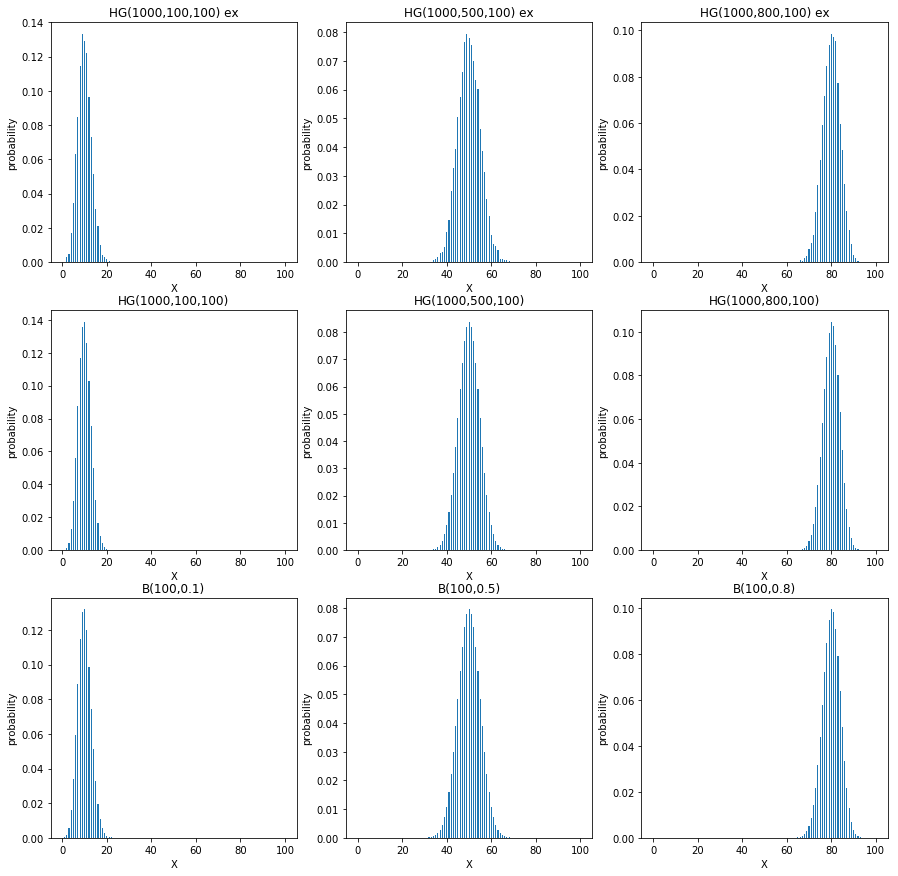

In [22]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb

#超幾何分布
#N個の中に当たりがA個あり、N個の中からn個選んだ時に、当たりがx個(X軸)でる確率(y軸)分布
#10000回ランダムにn個取り出す。
def hypergeometric_EX(N,A,n):
    freq = {i:0 for i in range(n+1)}
    box = ([1] * A + [0] * (N-A))
    # 1がA個(当たり) , 0が(N-A)個(外れ) , この中からランダムにn個選択し、1の数を数える。<= 10000回。
    # その数が10000回中何回あったかを辞書に格納。
    for i in range(10000):
        choice = np.random.choice(box,n)
        freq[len(np.where(choice == 1)[0])] += 1
    return freq

# 実験
fig,axes = plt.subplots(ncols=3,nrows=3,figsize=(15,15))
#復元抽出と非復元抽出の差がない例
print("二項分布(復元抽出)と超幾何分布(非復元抽出)に差がない例")
for (N,A),i in zip([(1000,100),(1000,500),(1000,800)],range(3)):
    # n = 100で固定
    freq = hypergeometric_EX(N,A,100)
    title = "HG({0},{1},100) ex".format(N,A)
    y = freq.values()
    sumy = sum(y)
    y = list(map(lambda x:x/sumy,y))
    axes[0,i].bar(list(range(101)),y,width=0.5)
    axes[0,i].set_title(title)
    axes[0,i].set_xlabel('X')
    axes[0,i].set_ylabel('probability')
    
#理論
f = lambda N,A,n,x:(comb(A,x) * comb((N-A),(n-x))) / comb(N,n)
for (N,A),i in zip([(1000,100),(1000,500),(1000,800)],range(3)):
    y = list(map(f,[N]*101,[A]*101,[100]*101,list(range(101))))
    title = "HG({0},{1},100)".format(N,A)
    axes[1,i].bar(list(range(101)),y,width=0.5)
    axes[1,i].set_title(title)
    axes[1,i].set_xlabel('X')
    axes[1,i].set_ylabel('probability')

#二項分布との比較
f2 = lambda n,x,p:comb(n,x) * (p ** x) * ((1 - p) ** (n-x))
for p,i in zip([0.1,0.5,0.8],range(3)):
    y = list(map(f2,[100] * (101),list(range(101)),[p] * (101)))
    title = 'B(100,{})'.format(p)
    axes[2,i].bar(x,y,width=0.5)
    axes[2,i].set_title(title)
    axes[2,i].set_xlabel('X')
    axes[2,i].set_ylabel('probability')
print("確率 p = (N / A) , n個取り出した時の当たりの個数の確率二項分布")


二項分布(復元抽出)と超幾何分布(非復元抽出)に差がある例


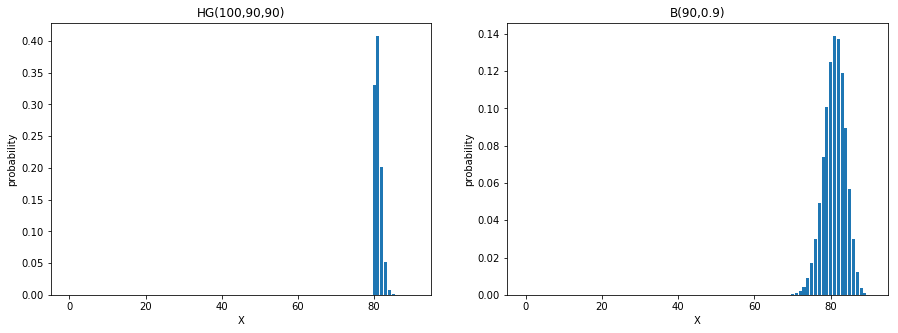

In [32]:
#復元抽出と非復元抽出の差がある例
# HG(100,90,90) と B(90,0.9) を比較する。
print("二項分布(復元抽出)と超幾何分布(非復元抽出)に差がある例")
f = lambda N,A,n,x:(comb(A,x) * comb((N-A),(n-x))) / comb(N,n)
f2 = lambda n,x,p:comb(n,x) * (p ** x) * ((1 - p) ** (n-x))
fig,axes = fig,axes = plt.subplots(ncols=2,figsize=(15,5))
y = list(map(f,[100]*91,[90]*91,[90]*91,list(range(91))))
axes[0].bar(list(range(91)),y,width=0.8)
axes[0].set_title("HG(100,90,90)")
axes[0].set_xlabel('X')
axes[0].set_ylabel('probability')
y = list(map(f2,[90]*91,list(range(91)),[0.9]*91))
axes[1].bar(list(range(91)),y,width=0.8)
axes[1].set_title("B(90,0.9)")
axes[1].set_xlabel('X')
axes[1].set_ylabel('probability')